In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set()
sns.set_style("white")

In [11]:
data_sum=[0,0,0,0]
data_inds=[0,0,0,0]
data_effects=[0,0,0,0]
titles=[0,0,0,0]
data_titles=[]

effects_sum=[]
effects_error=[]
effects_ind=[]

In [12]:
effect_sum = pd.read_csv("../RAW_DATA/effects/EffectSizes_SN/spm_ss_mROI_data.summaries.EffectSize.csv")
data_sum[0]= pd.read_csv("../RAW_DATA/effects/EffectSizes_SN/spm_ss_mROI_data.summaries.EffectSize.csv")
data_sum[1]= pd.read_csv("../RAW_DATA/effects/EffectSizes_SWN/spm_ss_mROI_data.summaries.EffectSize.csv")
data_sum[2]= pd.read_csv("../RAW_DATA/effects/EffectSizes_SWJN/spm_ss_mROI_data.summaries.EffectSize.csv")
data_sum[3]= pd.read_csv("../RAW_DATA/effects/EffectSizes_SNT/spm_ss_mROI_data.summaries.EffectSize.csv")

effects = pd.unique(effect_sum['Effect'])
data_effects[0]=pd.unique(data_sum[0]['Effect'])
data_effects[1]=pd.unique(data_sum[1]['Effect'])
data_effects[2]=pd.unique(data_sum[2]['Effect'])
data_effects[3]=pd.unique(data_sum[3]['Effect'])

effect_inds = pd.read_csv("../RAW_DATA/effects/EffectSizes_SN/spm_ss_mROI_data.csv")
data_inds[0]=pd.read_csv("../RAW_DATA/effects/EffectSizes_SN/spm_ss_mROI_data.csv")
data_inds[1]=pd.read_csv("../RAW_DATA/effects/EffectSizes_SWN/spm_ss_mROI_data.csv")
data_inds[2]=pd.read_csv("../RAW_DATA/effects/EffectSizes_SWJN/spm_ss_mROI_data.csv")
data_inds[3]=pd.read_csv("../RAW_DATA/effects/EffectSizes_SNT/spm_ss_mROI_data.csv")

#customize this block for each dataset
titles[0]='Language Localizer Versions: A, C, G, I, J'
titles[1]='Language Localizer Versions: B, D'
titles[2]='Language Localizer Versions: E, F, H'
titles[3]='Language Localizer Versions: K'
for i in range(0,len(data_inds)):
    nsubjs=len(data_inds[i]['Subject'].unique())
    data_titles.append(titles[i]+'  (n=%d)' % nsubjs)

print(data_effects)

[array(['S', 'N'], dtype=object), array(['S', 'W', 'N'], dtype=object), array(['S', 'W', 'J', 'N'], dtype=object), array(['S', 'N', 'T'], dtype=object)]


In [14]:
# roi_map={'LIFGorb':1,
# 'LIFG':2,
# 'LMFG':3,
# 'LAntTemp':4,
# 'LPostTemp':5,
# 'LAngG':6}
# effect_sum=effect_sum.replace({"ROI": roi_map})
# effect_inds=effect_inds.replace({"ROI": roi_map})

In [13]:
N = 6
index = np.arange(N)   
fig_dims = (60, 120)

spacing=[2.4,1.9,1.5,1.9]
alphas=[0.15,0.35,0.8,1.0]

SMALL_SIZE = 40
MEDIUM_SIZE = 45
BIGGER_SIZE = 60
BIGGEST_SIZE = 90

plt.rc('font', size=BIGGEST_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors=["#045a8d","#2b8cbe","#74a9cf","#bdc9e1"]
sns.set_palette(sns.color_palette(colors))

In [14]:
for i in range(0,len(data_sum)):
    effect_mean = list()
    effect_mean_errors = list()
    for effect in data_effects[i]:
        effect_mean.append(data_sum[i].loc[(data_sum[i].ROI<N+1)&(data_sum[i]['Effect']==effect)]['MeanEffect'])
        effect_mean_errors.append(data_sum[i].loc[(data_sum[i].ROI<N+1)&(data_sum[i]['Effect']==effect)]['StderrEffect'])
    eoi_ind = pd.DataFrame().reindex_like(data_inds[i])
    eoi_ind = eoi_ind.dropna(how='any',axis=0) 
    eoi_inds = eoi_ind.append(data_inds[i].loc[(data_inds[i].ROI<N+1)])
    for effect in data_effects[i]:
        eoi_ind = eoi_ind.append(eoi_inds[eoi_inds['Effect']==effect])
    effects_sum.append(effect_mean)
    effects_error.append(effect_mean_errors)
    effects_ind.append(eoi_ind)

Text(0.06, 0.5, 'Percent BOLD signal change')

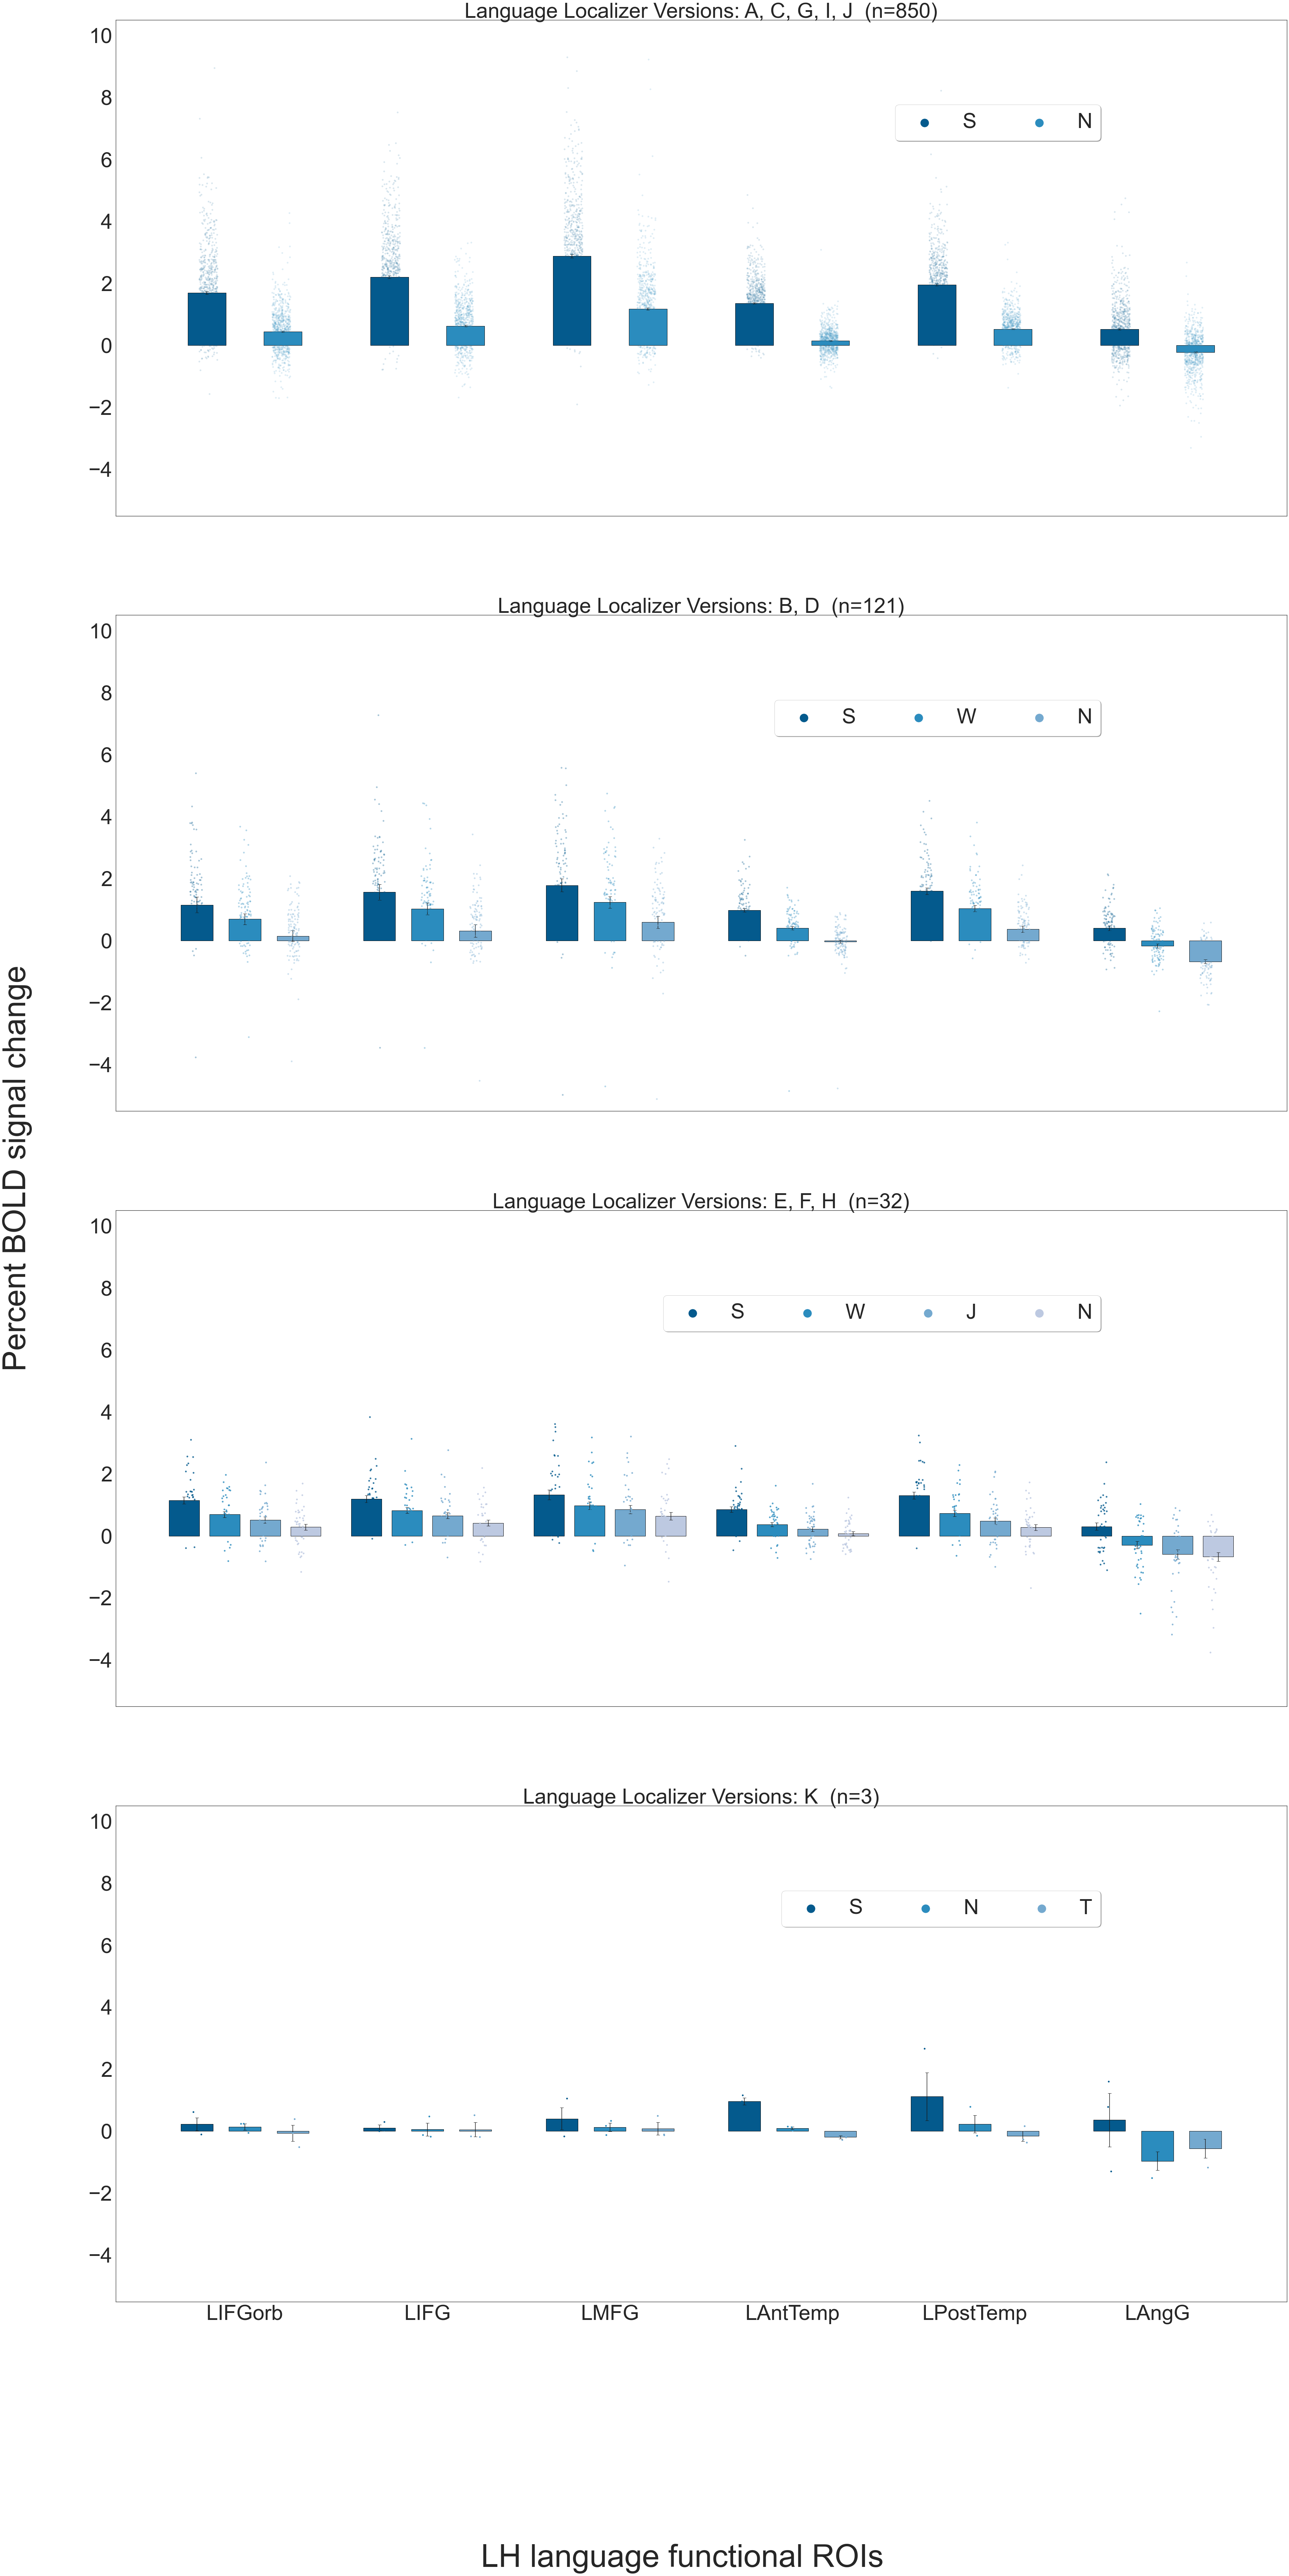

In [21]:
fig, axes = plt.subplots(4,1,sharex=True, sharey=True, figsize=fig_dims)

for i in range(0,len(axes)):
    sns.stripplot(x="ROI", y="EffectSize", 
                  hue='Effect',
                  data=effects_ind[i], 
                  alpha=alphas[i], 
                  dodge=True, 
                  size=5, 
                  ax=axes[i])

    space = np.linspace(-len(data_effects[i])/2,len(data_effects[i])/2,len(data_effects[i]))
    width = (1/float(len(data_effects[i])))/spacing[i]
    for ind, effect in enumerate(effects_sum[i]):
        p1 = axes[i].bar(index+width*space[ind], effect, width, edgecolor='black',yerr=effects_error[i][ind], capsize=5)

    # ax.set(xticklabels=['L_TE11','L_TE12','R_TE11','R_TE12'])
    #ax1.set(xticklabels=['LIFGorb','LIFG','LMFG','LAntTemp','LPostTemp','LAngG']) #,'R_IFGorb','R_IFG','R_MFG','R_AntTemp','R_PostTemp','R_AngG'])
    axes[i].set(ylim=[-5.5, 10.5])
    axes[i].set(title=data_titles[i])
    axes[i].set(xlabel='')
    axes[i].set(ylabel='')
    axes[i].legend(bbox_to_anchor=(.85, .85), ncol=4, fancybox=True, shadow=True, markerscale=3)

axes[-1].set(xticklabels=['LIFGorb','LIFG','LMFG','LAntTemp','LPostTemp','LAngG'])
fig.text(0.5, 0.04, 'LH language functional ROIs', ha='center', va='center')
fig.text(0.06, 0.5, 'Percent BOLD signal change', ha='center', va='center', rotation='vertical')